In [21]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.tri as tri

In [2]:
with open("streamlit_app/dataframe_all.pkl","rb") as file:
    dataframe_all = pickle.load(file)["dataframe"]

In [6]:
player_data = dataframe_all[dataframe_all["player"]=="James Harden"]
fgp = np.array(player_data["fgp"])
fgp3 = np.array(player_data["fgp3"])
years = np.array(player_data["season"])

mean_fgp = dataframe_all["fgp"].mean()
mean_fgp3 = dataframe_all["fgp3"].mean()

mean_perc = dataframe_all[["season","fgp","fgp3"]].groupby(["season"]).mean()
mean_perc_y = mean_perc.loc[years]

In [17]:
games_pl = player_data["games"].sum()
ppg_career = player_data["points"].sum() / games_pl
reb_career = player_data["tot_reb"].sum() / games_pl
ast_career = player_data["ast"].sum() / games_pl
ste_career = player_data["steals"].sum() / games_pl
blo_career = player_data["blocks"].sum() / games_pl
tov_career = player_data["tov"].sum() / games_pl
player_av_stats = [ppg_career,reb_career,ast_career,ste_career,blo_career,tov_career]
print(ppg_career,reb_career,ast_career)

24.693 5.648 7.015


In [9]:
player_data

,nbapersonid,player,draftyear,draftpick,career_outcome,season,team_list,num_teams_played,games,games_start,...,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,season_outcome,season_num
11381,201935,James Harden,2009,3.0,5,2009,[OKC],1,76,0,...,197,244,137,80,20,106,200,753,2,0
11382,201935,James Harden,2009,3.0,5,2010,[OKC],1,82,5,...,213,255,176,92,24,106,207,998,3,1
11383,201935,James Harden,2009,3.0,5,2011,[OKC],1,62,2,...,222,252,229,62,15,137,150,1044,3,2
11384,201935,James Harden,2009,3.0,5,2012,[HOU],1,78,78,...,317,379,455,142,38,295,178,2023,5,3
11385,201935,James Harden,2009,3.0,5,2013,[HOU],1,73,73,...,283,344,446,115,29,265,177,1851,5,4
11386,201935,James Harden,2009,3.0,5,2014,[HOU],1,81,81,...,384,459,565,154,60,321,208,2217,5,5
11387,201935,James Harden,2009,3.0,5,2015,[HOU],1,82,82,...,438,501,612,139,51,374,229,2376,4,6
11388,201935,James Harden,2009,3.0,5,2016,[HOU],1,81,81,...,564,659,907,121,38,464,215,2356,5,7
11389,201935,James Harden,2009,3.0,5,2017,[HOU],1,72,72,...,348,389,630,126,50,315,169,2191,5,8
11390,201935,James Harden,2009,3.0,5,2018,[HOU],1,78,78,...,452,518,586,158,58,387,244,2818,5,9


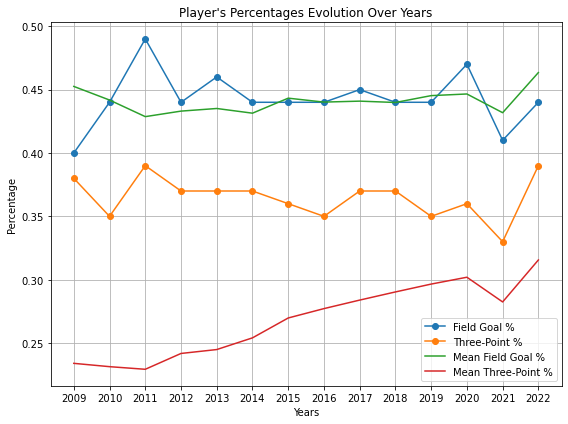

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(years, fgp, marker='o', label='Field Goal %')
plt.plot(years, fgp3, marker='o', label='Three-Point %')
plt.plot(years, np.array(mean_perc_y["fgp"]), label='Mean Field Goal %')
plt.plot(years, np.array(mean_perc_y["fgp3"]), label='Mean Three-Point %')

plt.title("Player's Percentages Evolution Over Years")
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(years)  # Show all years on the x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [26]:
league_max = [dataframe_all["points"].max()/82,dataframe_all["ast"].max()/82,dataframe_all["tot_reb"].max()/82,dataframe_all["steals"].max()/82,dataframe_all["blocks"].max()/82,dataframe_all["tov"].max()/82]
labels = ["ppg","astpg","rebpg","stpg","blpg","tov"]
proportions = [player_av_stats[i]/league_max[i] for i in range(len(league_max))]

In [27]:
def hex_plot(proportions, labels):
    N = len(proportions)
    proportions = np.append(proportions, 1)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    x = np.append(np.sin(theta), 0)
    y = np.append(np.cos(theta), 0)
    triangles = [[N, i, (i + 1) % N] for i in range(N)]
    triang_backgr = tri.Triangulation(x, y, triangles)
    triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
    cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
    colors = np.linspace(0, 1, N + 1)
    plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
    plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
    plt.triplot(triang_backgr, color='white', lw=2)
    for label, color, xi, yi in zip(labels, colors, x, y):
        plt.text(xi * 1.05, yi * 1.05, label,  # color=cmap(color),
                 ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
                 va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
    plt.axis('off')
    plt.gca().set_aspect('equal')
    plt.show()

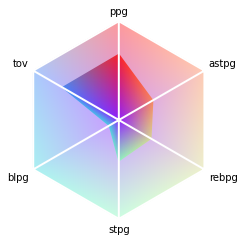

In [28]:
hex_plot(proportions,labels)

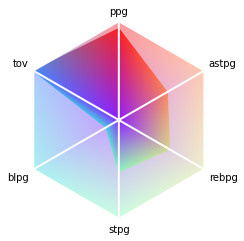

In [31]:

ppg_peak_career = player_data["points"].max() / 82
reb_peak_career = player_data["tot_reb"].max() / 82
ast_peak_career = player_data["ast"].max() / 82
ste_peak_career = player_data["steals"].max() / 82
blo_peak_career = player_data["blocks"].max() / 82
tov_peak_career = player_data["tov"].max() / 82
player_peak_stats = [ppg_peak_career,reb_peak_career,ast_peak_career,ste_peak_career,blo_peak_career,tov_peak_career]

proportions_peak = [player_peak_stats[i]/league_max[i] for i in range(len(league_max))]
hex_plot(proportions_peak,labels)

In [32]:
proportions_peak

[0.9266688589279842,
 0.5661512027491409,
 0.5928104575163398,
 0.5249169435215947,
 0.15113350125944583,
 1.0]

<AxesSubplot:>

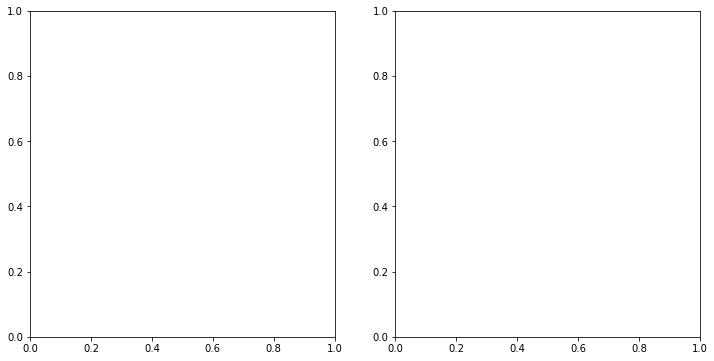

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0]

N = len(proportions)
proportions = np.append(proportions, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,  # color=cmap(color),
                ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
                va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.show()

In [39]:
def hex_plot(proportions1, proportions2, labels):
    def plot(ax, proportions, labels):
        N = len(proportions)
        proportions = np.append(proportions, 1)
        theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
        x = np.append(np.sin(theta), 0)
        y = np.append(np.cos(theta), 0)
        triangles = [[N, i, (i + 1) % N] for i in range(N)]
        triang_backgr = tri.Triangulation(x, y, triangles)
        triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
        cmap = plt.cm.rainbow_r
        colors = np.linspace(0, 1, N + 1)
        
        ax.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
        ax.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
        ax.triplot(triang_backgr, color='white', lw=2)
        for label, color, xi, yi in zip(labels, colors, x, y):
            ax.text(xi * 1.05, yi * 1.05, label,
                    ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
                    va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
        ax.axis('off')
        ax.set_aspect('equal')
    
    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    plot(axs[0], proportions1, labels)
    plot(axs[1], proportions2, labels)
    
    return fig

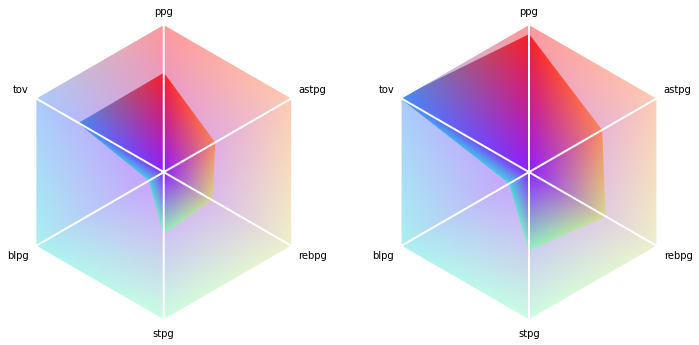

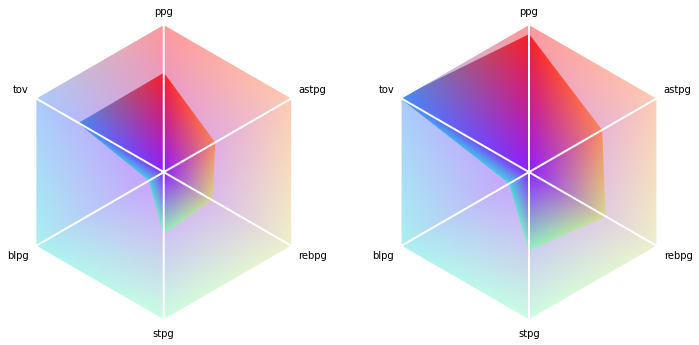

In [40]:
hex_plot(proportions,proportions_peak,labels)

In [43]:
def hex_plot2(proportions1, proportions2, labels):
    def plot(ax, proportions, labels):
        N = len(proportions)
        proportions = np.append(proportions, 1)
        theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
        x = np.append(np.sin(theta), 0)
        y = np.append(np.cos(theta), 0)
        triangles = [[N, i, (i + 1) % N] for i in range(N)]
        triang_backgr = tri.Triangulation(x, y, triangles)
        triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
        cmap = plt.cm.rainbow_r
        colors = np.linspace(0, 1, N + 1)
        
        ax.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
        ax.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
        ax.triplot(triang_backgr, color='white', lw=2)
        for label, color, xi, yi in zip(labels, colors, x, y):
            ax.text(xi * 1.05, yi * 1.05, label,
                    ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
                    va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
        ax.axis('off')
        ax.set_aspect('equal')
    
    # Create the plots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    plot(axs[0], proportions1, labels)
    plot(axs[1], proportions2, labels)
    
    fig.tight_layout()  # Adjusts subplots to avoid overlapping
    
    return fig

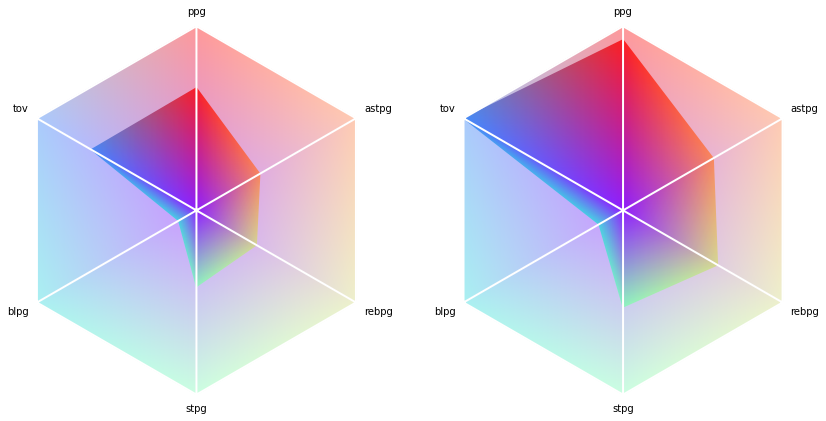

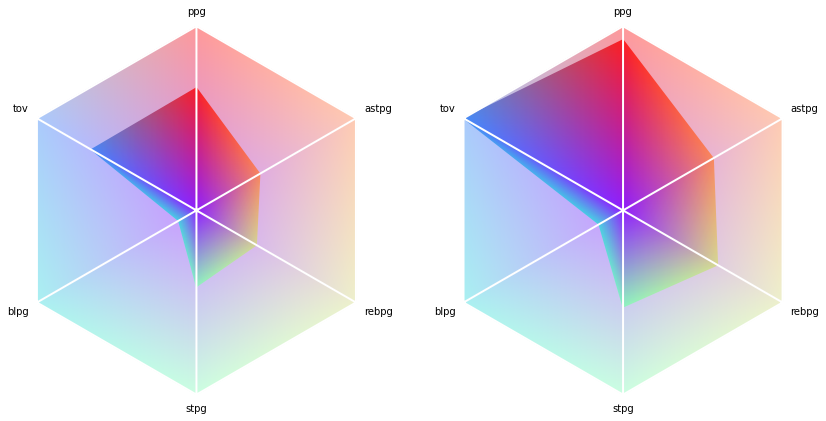

In [44]:
hex_plot2(proportions,proportions_peak,labels)